# Traffic Sign Classification
**Need:** The world is moving towards machine learning & AI, therefore more are becomming interested in self driving cars. These cars need to recognise traffic signs in order to drive safely.

**Data:** The data is coming from the German Traffic Sign Recognition Benchmark. This data contains thousands of test and train pictures of traffic signs as well as a text file with the corresponding traffic sign name.

In [1]:
# Import needed dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


# Understand & Retrieve Data

In [3]:
# Set up
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for x in images:
        try:
            image = Image.open(path + '/'+ x)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except Exception as err:
            print(err)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
# Understand data better
print(data.shape, labels.shape)

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Build CNN Model

In [6]:
def create_model():
    """
    Creates CNN model.
    """
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    return model

model = create_model()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Evaluation of model
epochs = 15
r = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 68s 2ms/step - loss: 1.7921 - accuracy: 0.5495 - val_loss: 0.2918 - val_accuracy: 0.9208
Epoch 2/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.4548 - accuracy: 0.8725 - val_loss: 0.1086 - val_accuracy: 0.9695
Epoch 3/15
31367/31367 [==============================] - 72s 2ms/step - loss: 0.3045 - accuracy: 0.9160 - val_loss: 0.1146 - val_accuracy: 0.9677
Epoch 4/15
31367/31367 [==============================] - 77s 2ms/step - loss: 0.2653 - accuracy: 0.9271 - val_loss: 0.0763 - val_accuracy: 0.9788
Epoch 5/15
31367/31367 [==============================] - 70s 2ms/step - loss: 0.2306 - accuracy: 0.9373 - val_loss: 0.0640 - val_accuracy: 0.9815
Epoch 6/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.2341 - accuracy: 0.9398 - val_loss: 0.0672 - val_accuracy: 0.9818
Epoch 7/15
31367/31367 [==============================] - 72s 2ms/ste

# Analyze Model

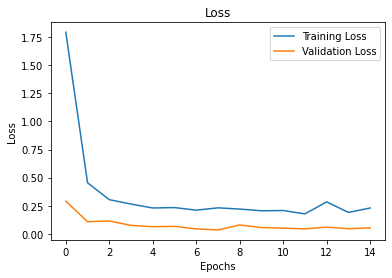

In [7]:
# Plot loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

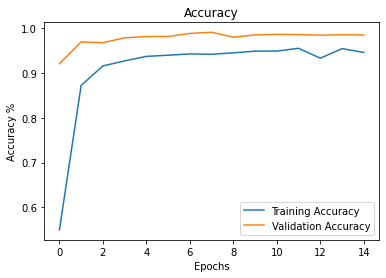

In [9]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.legend()

In [10]:
# Better understanding accuracy of model
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)
pred = model.predict_classes(X_test)
# Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9539984164687253


# Saving the Model

In [12]:
model.save("traffic_classifier.h5")

# Real Life Example Predictions

In [13]:
from keras.models import load_model
# Loading the model
model = load_model('traffic_classifier.h5')

In [14]:
# Defining the classes
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [44]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred + 1]
    print(sign)

Speed limit (50km/h)


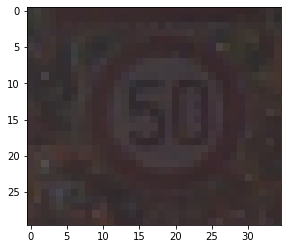

In [45]:
import matplotlib.image as mpimg
img = mpimg.imread("./Train/2/00002_00000_00000.png")
plt.imshow(img)
classify("./Train/2/00002_00000_00000.png")

General caution


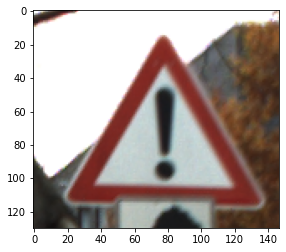

In [49]:
img = mpimg.imread("./Test/00006.png")
plt.imshow(img)
classify("./Test/00006.png")

Speed limit (80km/h)


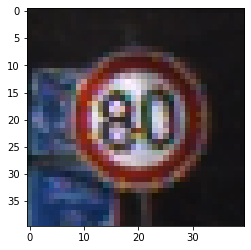

In [50]:
img = mpimg.imread("./Test/00030.png")
plt.imshow(img)
classify("./Test/00030.png")

Turn right ahead


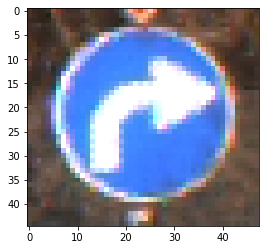

In [51]:
img = mpimg.imread("./Test/00108.png")
plt.imshow(img)
classify("./Test/00108.png")